In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

- use the data from the file, read it to a dataframe and make any modification that
you may find useful to solve the task
- the figsize is still the same, you can choose whatever fontsize you like
- the color palette should be the same as in the example
- the fontsize of the title is 15
- the width of the box lines is 3, the width of the median lines is 2
- at the end of your Jupyter Notebook, create a markdown cell and insert the question:
“What was the IQR of the control group before the newsfeed?” In your answer, put
the approximate value that you can get just by looking at the graph, round it to
the nearest 10

In [2]:
df = pd.read_csv('../data/ab-test.csv')
df.head(5)

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   uid     44 non-null     object 
 1   diff    44 non-null     float64
 2   time    44 non-null     object 
 3   group   44 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.5+ KB


In [4]:
df.group.value_counts()

group
control    30
test       14
Name: count, dtype: int64

In [5]:
df.shape

(44, 4)

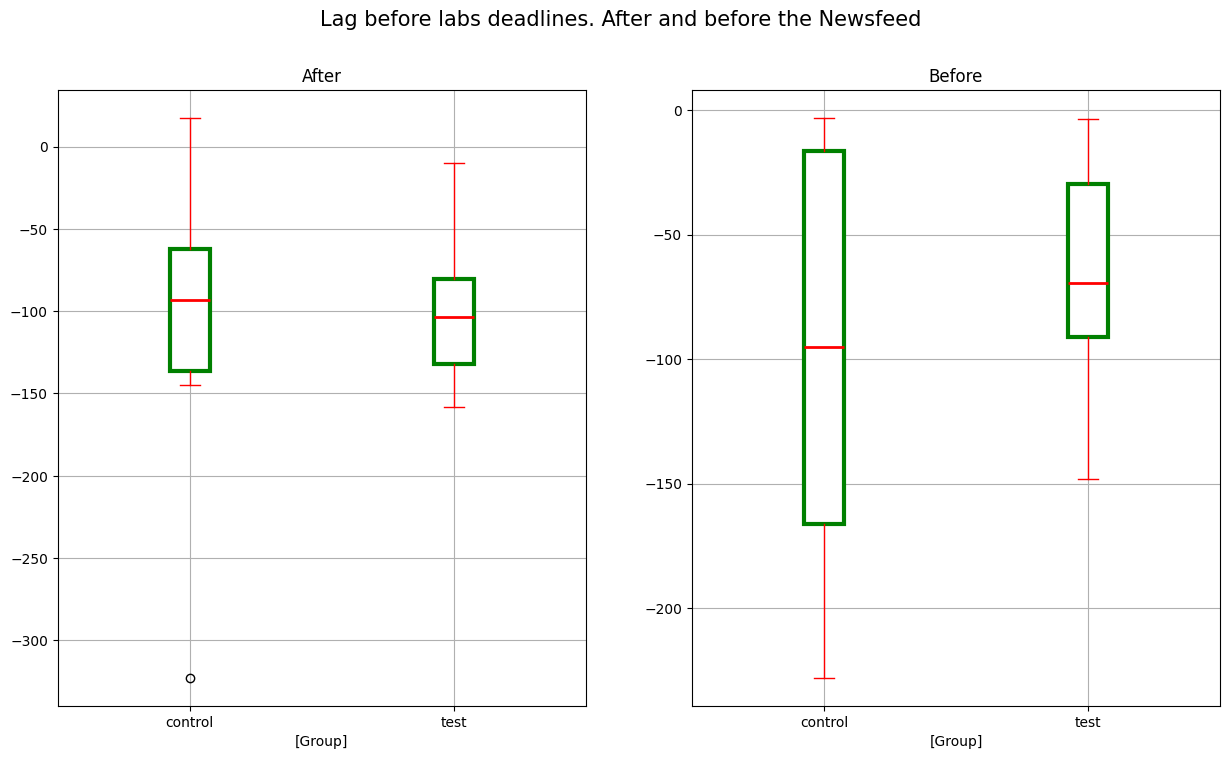

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# After
after_data = df[df['time'] == 'after']
after_groups = after_data.groupby('group')['diff'].apply(list).values.tolist()

ax[0].boxplot(after_groups, patch_artist=True, boxprops=dict(color = 'green',facecolor='white', linewidth=3),
              medianprops=dict(color='red', linewidth=2), whiskerprops=dict(color='red'), capprops=dict(color='red'))
ax[0].set_xticklabels(['control', 'test'])
ax[0].set_title('After')
ax[0].grid(True)
ax[0].set_xlabel('[Group]')

# Before
before_data = df[df['time'] == 'before']
before_groups = before_data.groupby('group')['diff'].apply(list).values.tolist()

ax[1].boxplot(before_groups, patch_artist=True, boxprops=dict(color = 'green',facecolor='white', linewidth=3),
              medianprops=dict(color='red', linewidth=2), whiskerprops=dict(color='red'), capprops=dict(color='red'))
ax[1].set_xticklabels(['control', 'test'])
ax[1].set_title('Before')
ax[1].grid(True)
ax[1].set_xlabel('[Group]')

fig.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)
plt.show()

at the end of your Jupyter Notebook, create a markdown cell and insert the question:
“What was the IQR of the control group before the newsfeed?” In your answer, put
the approximate value that you can get just by looking at the graph, round it to
the nearest 10  
ANSWER: 150